<a href="https://colab.research.google.com/github/Mayu-infinite/Practice/blob/main/IML_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Loading***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import time

import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = '/content/drive/MyDrive/NY-House-Dataset.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
data.isnull().sum()

,0
BROKERTITLE,0
TYPE,0
PRICE,0
BEDS,0
BATH,0
PROPERTYSQFT,0
ADDRESS,0
STATE,0
MAIN_ADDRESS,0
ADMINISTRATIVE_AREA_LEVEL_2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

# ***Pre-processing and Visualization***
***Keeping only numerical columns (only 3) for better visualization and graphs.***

In [ ]:
# Assuming 'data' is your DataFrame loaded from the CSV file
# Select only columns with data types int64 and float64
data = data.select_dtypes(include=['int64', 'float64'])

# Display the first few rows of the filtered data
data.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
0,315000,2,2.000000,1400.0,40.761255,-73.974483
1,195000000,7,10.000000,17545.0,40.766393,-73.980991
2,260000,4,2.000000,2015.0,40.541805,-74.196109
3,69000,3,1.000000,445.0,40.761398,-73.974613
4,55000000,7,2.373861,14175.0,40.767224,-73.969856


### ***Before droping latitude and longitude***

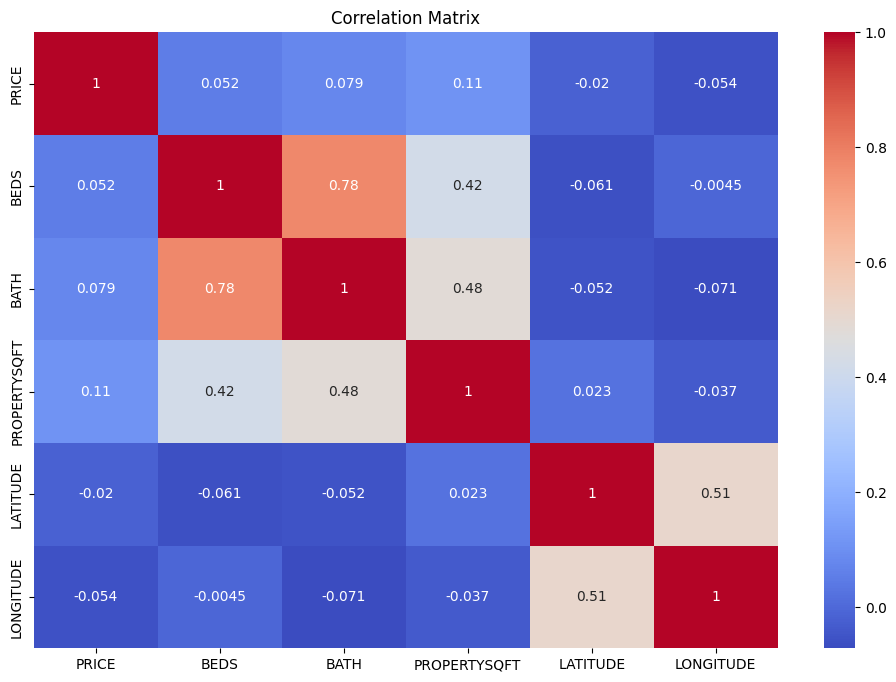

In [ ]:
# Check correlations between numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### ***After droping latitude and longitude***

In [ ]:
# drop latitude and longitude
data=data.drop(columns=['LATITUDE','LONGITUDE'])

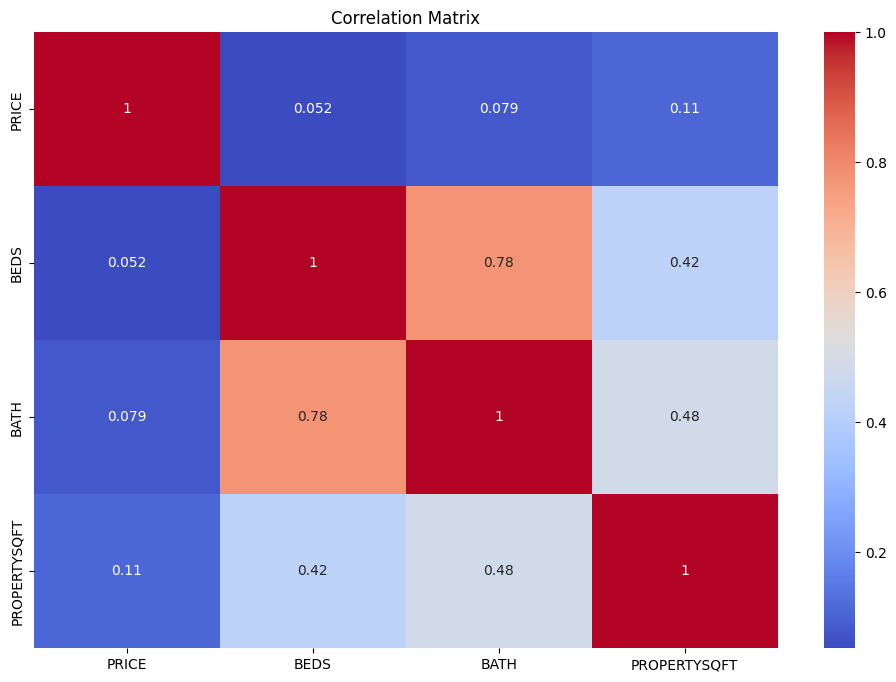

In [ ]:
# Check correlations between numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## ***Distibution Curves***

### ***Checking for outliers***

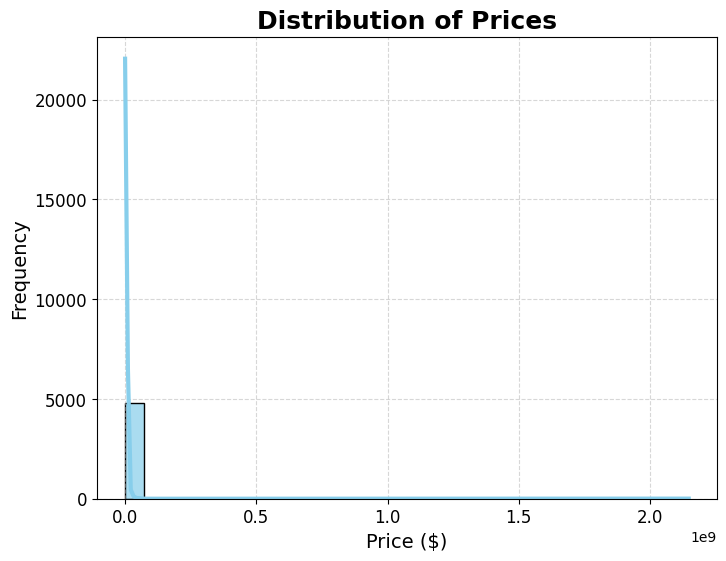

In [ ]:
# Enhanced price distribution plot
plt.figure(figsize=(8, 6))

# Use a specific color palette and add transparency to the histogram
sns.histplot(data['PRICE'], bins=30, kde=True, color='skyblue', line_kws={'lw': 3}, alpha=0.7)

# Set the title with larger font size and bold text
plt.title('Distribution of Prices', fontsize=18, fontweight='bold')

# Customize the x and y labels with larger font sizes
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Customize the ticks on both axes for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

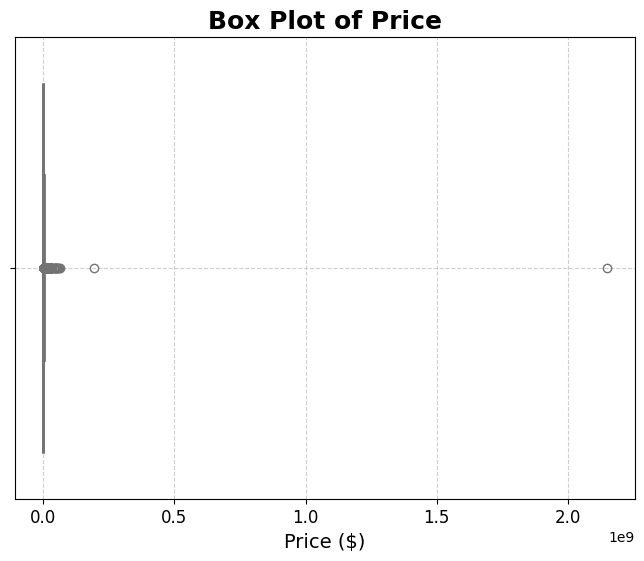

In [ ]:
# Box plot of the 'PRICE' variable
plt.figure(figsize=(8, 6))

# Create a boxplot with customized settings
sns.boxplot(x=data['PRICE'], color='lightgreen', linewidth=2)

# Set the title and labels with appropriate font sizes
plt.title('Box Plot of Price', fontsize=18, fontweight='bold')
plt.xlabel('Price ($)', fontsize=14)

# Customize the ticks on the x-axis
plt.xticks(fontsize=12)

# Add a grid to the plot for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

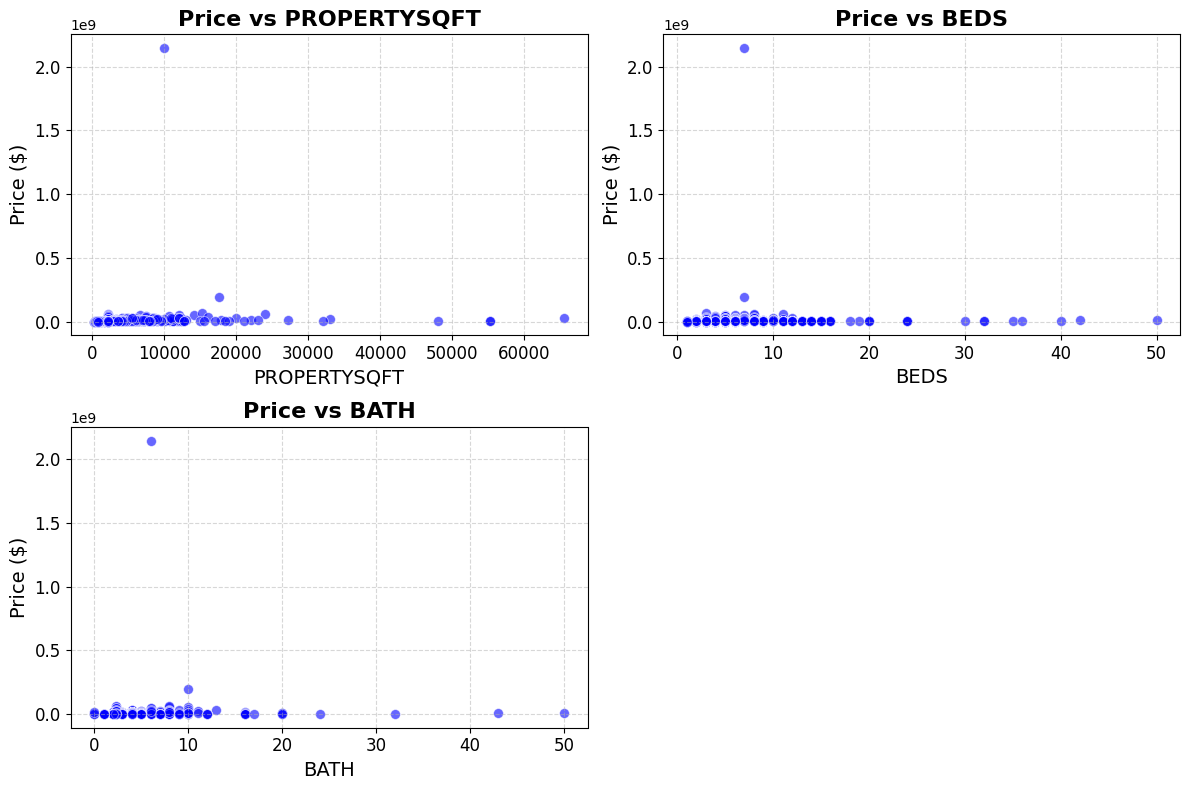

In [ ]:
# List of features to plot against PRICE
feat = ["PROPERTYSQFT", "BEDS", "BATH"]

# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through the features and create scatter plots
for i, feature in enumerate(feat):
    plt.subplot(2, 2, i + 1)  # Create a subplot grid of 2x2, plot in position i+1
    sns.scatterplot(x=data[feature], y=data['PRICE'], color='blue', s=50, alpha=0.6)

    # Set titles and labels
    plt.title(f'Price vs {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Price ($)', fontsize=14)

    # Customize ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

***From the above graphs we can observe that there is an outlier (where price > 1e9)***

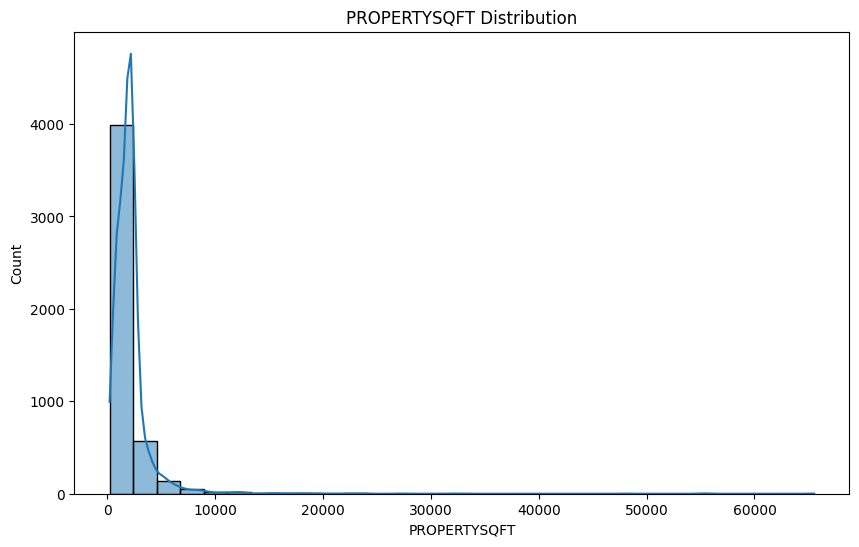

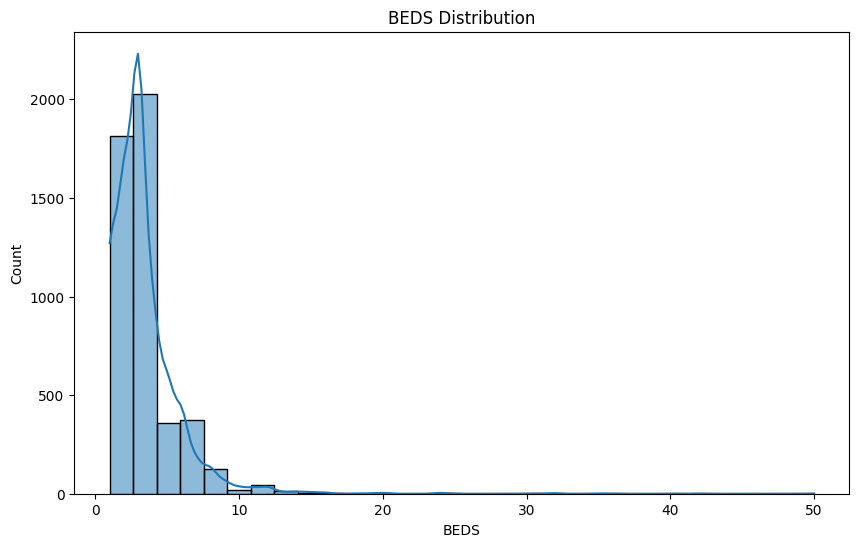

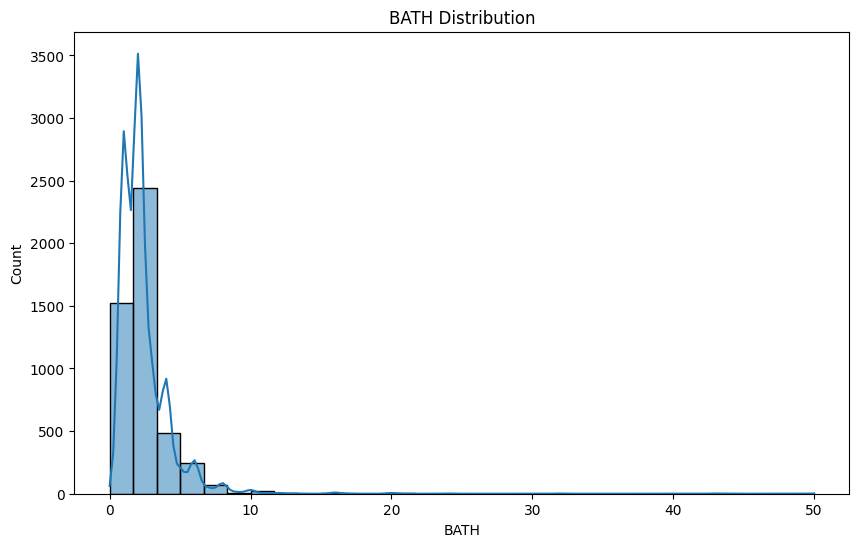

In [ ]:
# plot distribution of all other features
feat = ["PROPERTYSQFT", "BEDS", "BATH"]

for f in feat:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[f], bins=30, kde=True)
    plt.title(f'{f} Distribution')
    plt.xlabel(f'{f}')

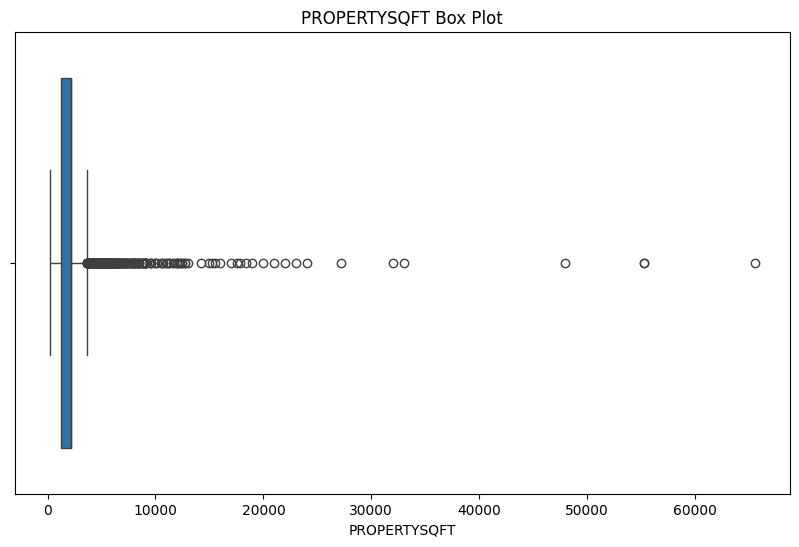

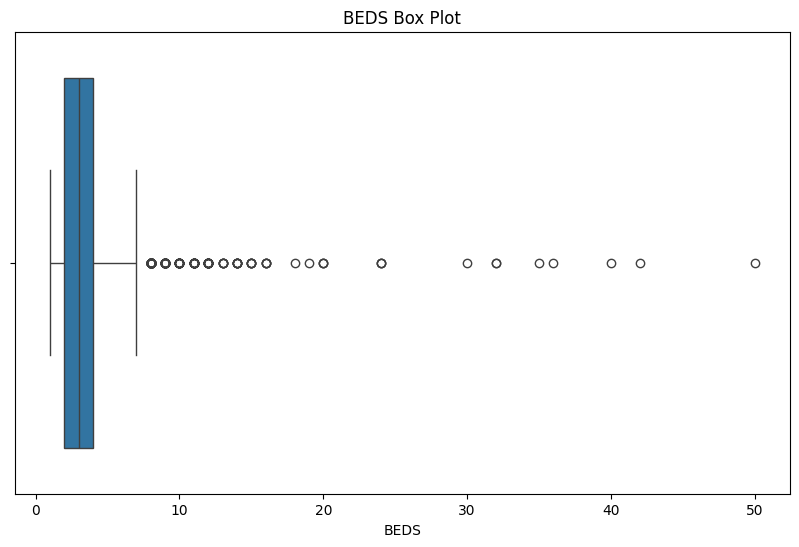

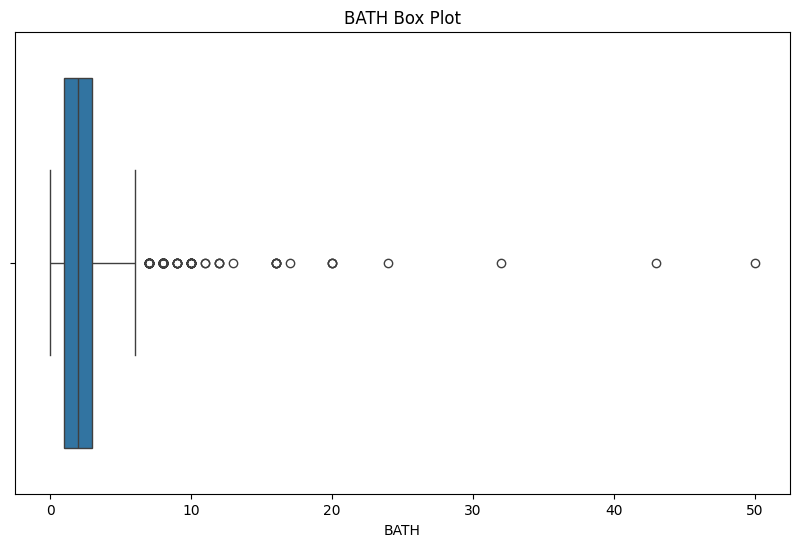

In [ ]:
# make vertical box plots
feat = ["PROPERTYSQFT", "BEDS", "BATH"]

for f in feat:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[f])
    plt.title(f'{f} Box Plot')
    plt.xlabel(f'{f}')

### ***Removing outliers***

In [ ]:
# Step 1: Calculate the 99th percentile of the 'PRICE' column
price_99_percentile = data['PRICE'].quantile(0.99)
print(f"99th percentile of PRICE: {price_99_percentile}")

99th percentile of PRICE: 22500000.0


In [ ]:
# Step 2: Filter the DataFrame to remove rows with 'PRICE' above the 99th percentile
data = data[data['PRICE'] < price_99_percentile]

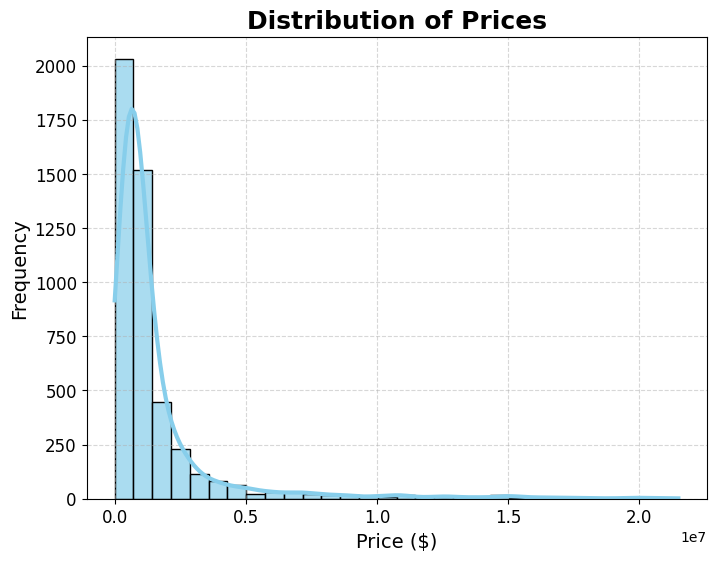

In [ ]:
# Enhanced price distribution plot
plt.figure(figsize=(8, 6))

# Use a specific color palette and add transparency to the histogram
sns.histplot(data['PRICE'], bins=30, kde=True, color='skyblue', line_kws={'lw': 3}, alpha=0.7)

# Set the title with larger font size and bold text
plt.title('Distribution of Prices', fontsize=18, fontweight='bold')

# Customize the x and y labels with larger font sizes
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Customize the ticks on both axes for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

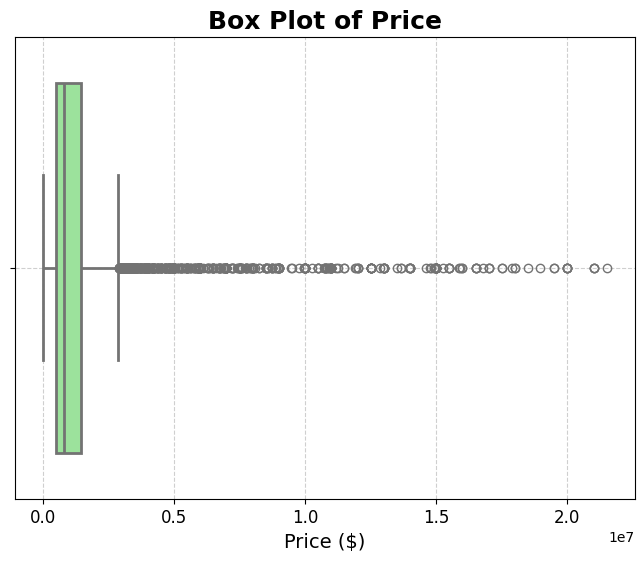

In [ ]:
# Box plot of the 'PRICE' variable
plt.figure(figsize=(8, 6))

# Create a boxplot with customized settings
sns.boxplot(x=data['PRICE'], color='lightgreen', linewidth=2)

# Set the title and labels with appropriate font sizes
plt.title('Box Plot of Price', fontsize=18, fontweight='bold')
plt.xlabel('Price ($)', fontsize=14)

# Customize the ticks on the x-axis
plt.xticks(fontsize=12)

# Add a grid to the plot for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

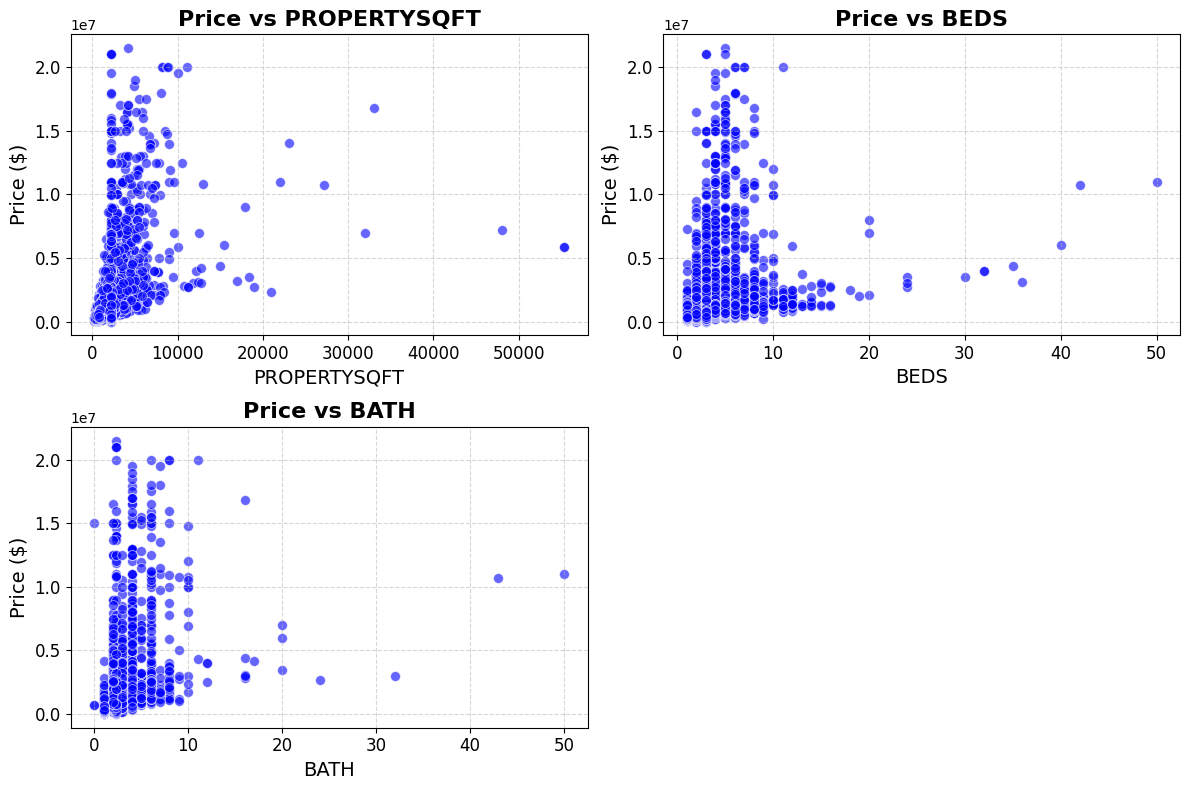

In [ ]:
# List of features to plot against PRICE
feat = ["PROPERTYSQFT", "BEDS", "BATH"]

# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through the features and create scatter plots
for i, feature in enumerate(feat):
    plt.subplot(2, 2, i + 1)  # Create a subplot grid of 2x2, plot in position i+1
    sns.scatterplot(x=data[feature], y=data['PRICE'], color='blue', s=50, alpha=0.6)

    # Set titles and labels
    plt.title(f'Price vs {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Price ($)', fontsize=14)

    # Customize ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

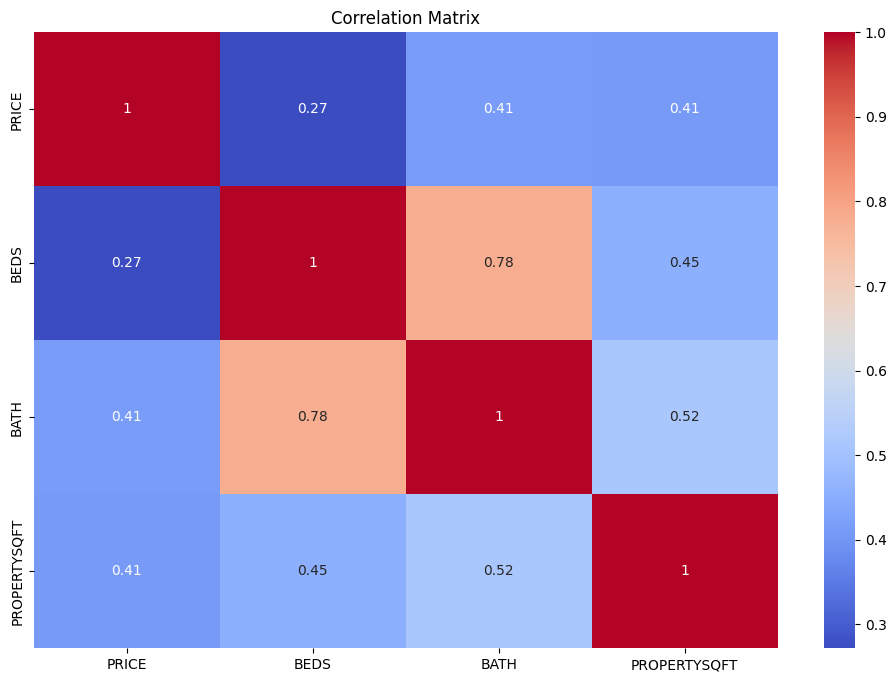

In [ ]:
# Check correlations between numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# print price column statistics
data['PRICE'].describe()

,PRICE
count,4.751000e+03
mean,1.562293e+06
std,2.447522e+06
min,2.494000e+03
25%,4.950000e+05
50%,8.000000e+05
75%,1.450000e+06
max,2.150000e+07


# ***Model Training***

### ***Splitting***

In [ ]:
# Select the two best features
features = ['PROPERTYSQFT', 'BEDS', 'BATH']
X = data[features]
y = data['PRICE']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Linear Regression model
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train.to_numpy()
X_test_scaled = X_test.to_numpy()

### ***Helper Functions***

In [ ]:
import matplotlib.pyplot as plt

def plot_linear_regression(X_train_scaled, y_train, y_pred_train, X_test_scaled, y_test, y_pred_test, selected_feature_indices, feature_names):
    """
    Plots the data and fitted line for linear regression for three features in a single figure with subplots.

    Parameters:
    - X_train_scaled: Scaled training feature data (NumPy array).
    - y_train: Training target values (NumPy array).
    - X_test_scaled: Scaled test feature data (NumPy array).
    - y_pred: Predicted values from the model (NumPy array).
    - selected_feature_indices: List of three integers representing the feature indices.
    - feature_names: List of feature names corresponding to the selected indices.
    """

    # Create a figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i in range(3):
        # Sort X_test_scaled and y_pred as per the current feature's column
        sorted_indices = np.argsort(X_test_scaled[:, selected_feature_indices[i]])
        X_test_sorted = X_test_scaled[sorted_indices]
        y_pred_sorted = y_pred_test[sorted_indices]

        # Plot data and fitted line on the corresponding subplot
        axes[i].scatter(X_test_scaled[:, selected_feature_indices[i]], y_test, color='blue', s=50, alpha=0.7, label='Actual', edgecolor='k')
        axes[i].plot(X_test_sorted[:, selected_feature_indices[i]], y_pred_sorted, color='red', linewidth=2, label='Predicted')
        axes[i].set_xlabel(feature_names[i], fontsize=12)
        axes[i].set_ylabel('PRICE', fontsize=12)
        axes[i].set_title(f'Linear Regression (TESTING): {feature_names[i]} vs PRICE', fontsize=14)
        axes[i].legend(loc='best')
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i in range(3):
        # Sort X_test_scaled and y_pred as per the current feature's column
        sorted_indices = np.argsort(X_train_scaled[:, selected_feature_indices[i]])
        X_train_sorted = X_train_scaled[sorted_indices]
        y_pred_sorted = y_pred_train[sorted_indices]

        # Plot data and fitted line on the corresponding subplot
        axes[i].scatter(X_train_scaled[:, selected_feature_indices[i]], y_train, color='blue', s=50, alpha=0.7, label='Actual', edgecolor='k')
        axes[i].plot(X_train_sorted[:, selected_feature_indices[i]], y_pred_sorted, color='red', linewidth=2, label='Predicted')
        axes[i].set_xlabel(feature_names[i], fontsize=12)
        axes[i].set_ylabel('PRICE', fontsize=12)
        axes[i].set_title(f'Linear Regression (TRAINING): {feature_names[i]} vs PRICE', fontsize=14)
        axes[i].legend(loc='best')
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

In [ ]:
def evaluate_and_plot_model(model, X_train_scaled, y_train, X_test_scaled, y_test, selected_feature_indices, feature_names):
    """
    Fits the model, predicts on the test set, evaluates the model, and plots the results.

    Parameters:
    - model: The regression model to be fitted and evaluated.
    - X_train_scaled: Scaled training feature data (NumPy array).
    - y_train: Training target values (NumPy array).
    - X_test_scaled: Scaled test feature data (NumPy array).
    - y_test: Actual target values for the test data (NumPy array).
    - selected_feature_indices: List of three integers representing the feature indices.
    - feature_names: List of feature names corresponding to the selected indices.
    """

    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)

    # Evaluate the model
    mse_train = mean_squared_error(y_train, y_pred_train)
    # r2_train = r2_score(y_test, y_pred)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred_test)
    # r2_test = r2_score(y_test, y_pred)

    print(f"Model MSE Training: {mse_train}")
    print(f"Model MSE Testing: {mse_test}")
    # print(f"Model R^2: {r2}")

    # Get coefficients and intercept (bias) if they exist
    if hasattr(model, 'coef_'):
        model_coeff = model.coef_
        print(f"Model Coefficients: {model_coeff}")

    if hasattr(model, 'intercept_'):
        bias = model.intercept_
        print(f"Model Bias: {bias}")

    print()  # For better readability of output

    # Plot the results using the previously defined function
    plot_linear_regression(X_train_scaled, y_train, y_pred_train, X_test_scaled, y_test, y_pred_test, selected_feature_indices, feature_names)

# Usage example
selected_feature_indices = [0, 1, 2]  # Indices for "PROPERTYSQFT", "BEDS", "BATH"
feature_names = ["PROPERTYSQFT", "BEDS", "BATH"]

Model MSE Training: 4712710625652.938
Model MSE Testing: 4153525760114.724
Model Coefficients: [ 2.96381427e+02 -1.34386826e+05  4.75328041e+05]
Model Bias: 271377.4520238405



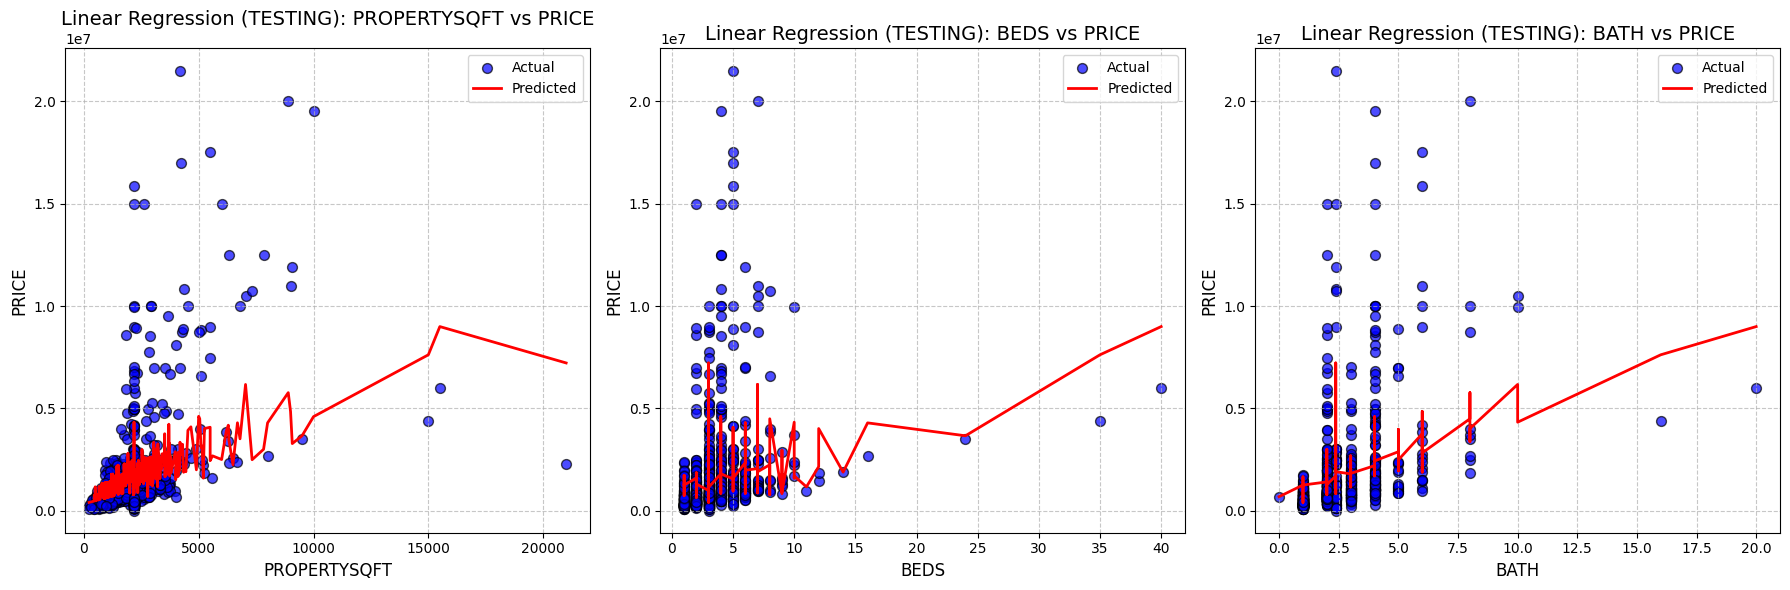

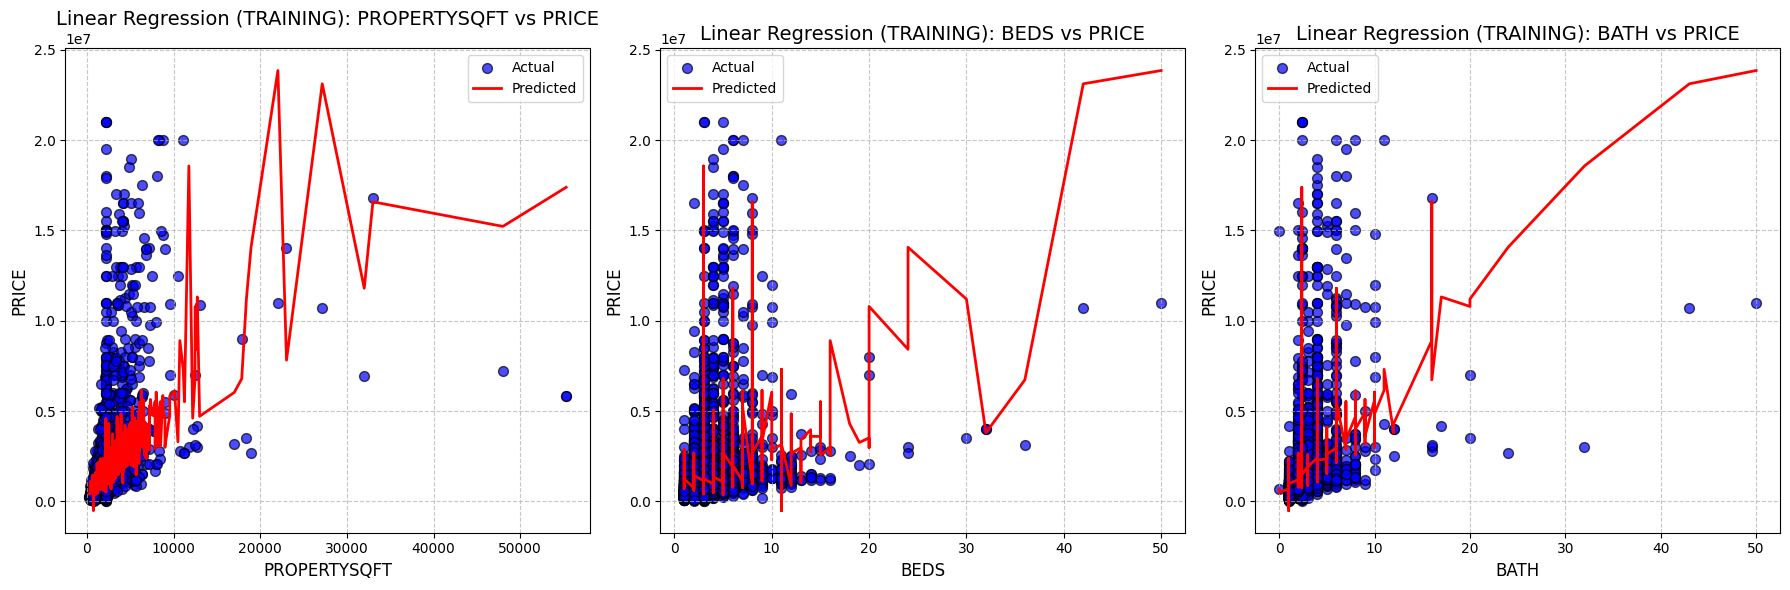

In [ ]:
lr_model = LinearRegression()

evaluate_and_plot_model(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, selected_feature_indices, feature_names)

Model MSE Training: 4712710625652.956
Model MSE Testing: 4153525803668.7866
Model Coefficients: [ 2.96381437e+02 -1.34386751e+05  4.75327933e+05]
Model Bias: 271377.43189118337



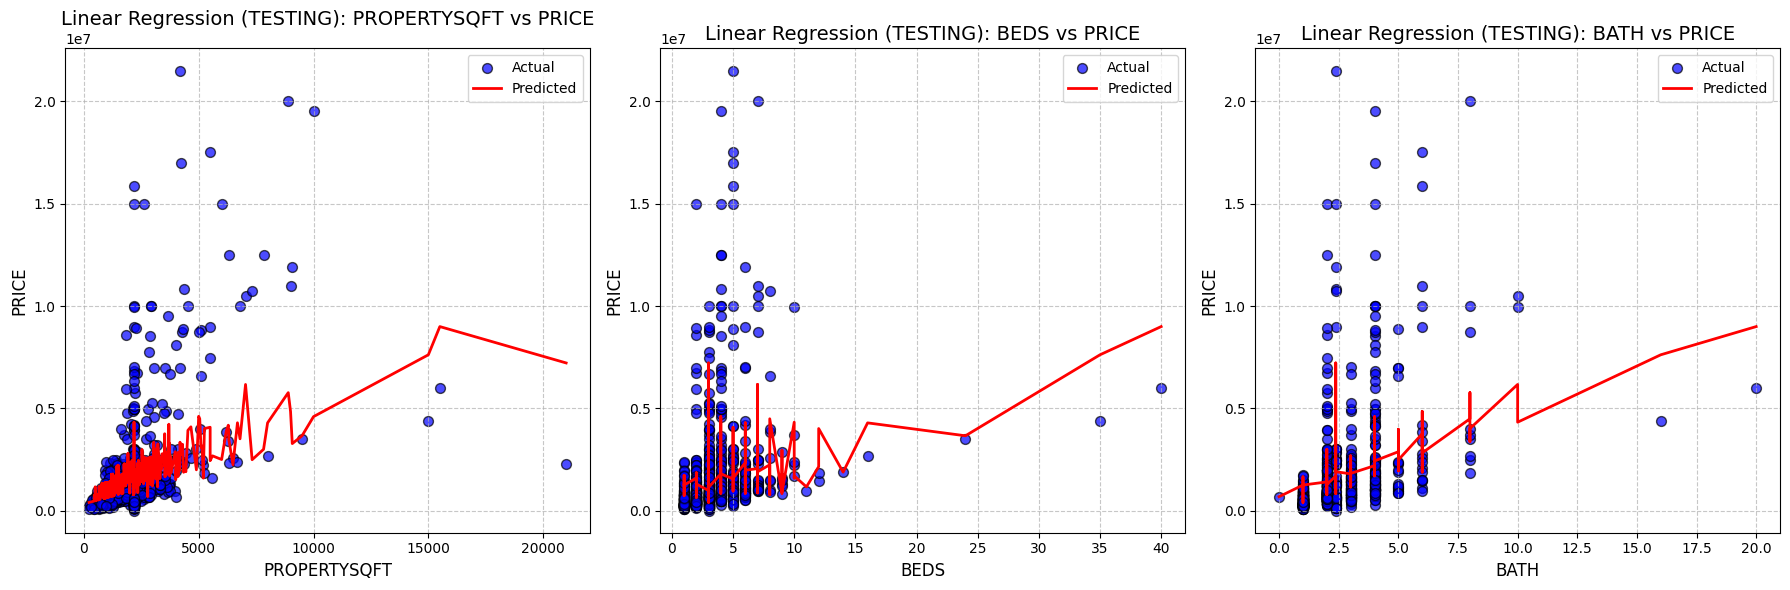

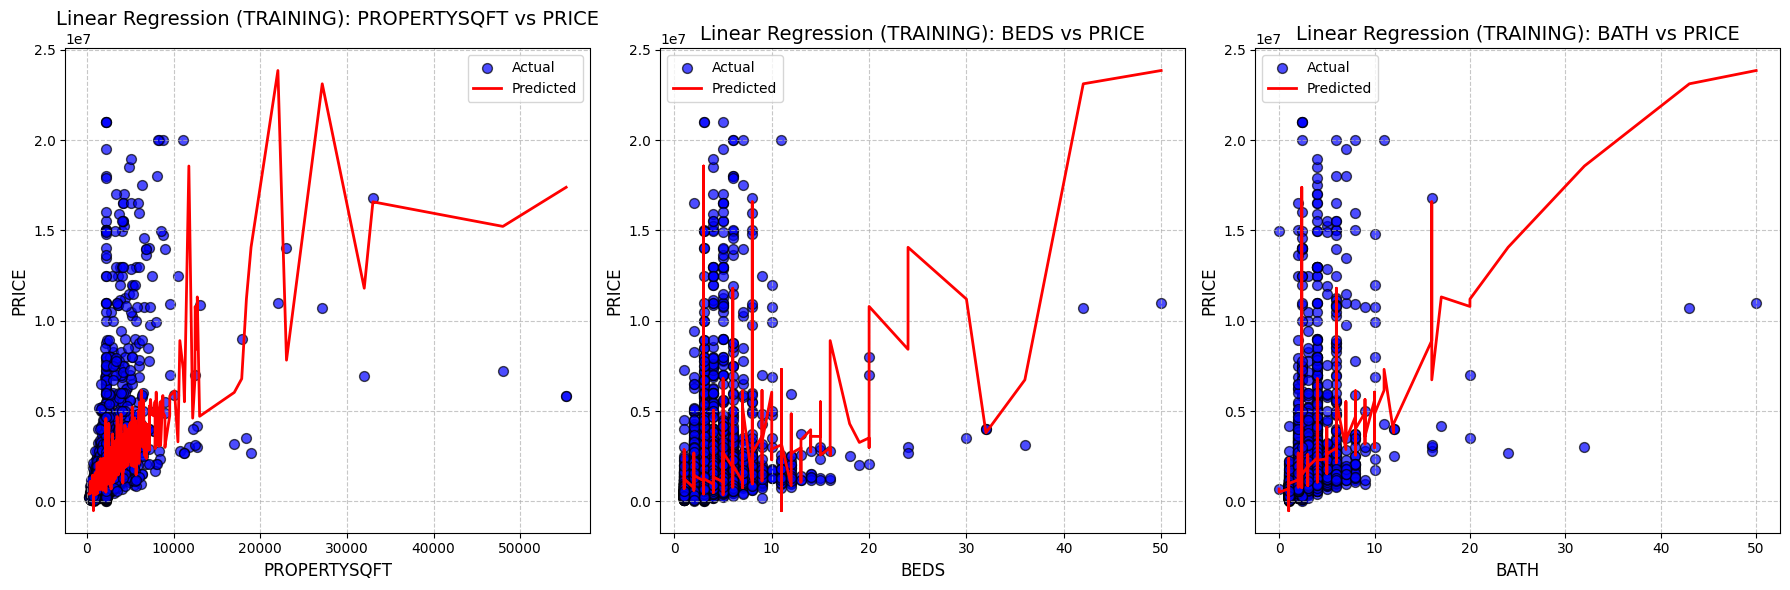

In [ ]:
# Train a Linear Regression Model with L1 normalization
lasso_model = Lasso(alpha=0.1)

evaluate_and_plot_model(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test, selected_feature_indices, feature_names)

Model MSE Training: 4712710625801.288
Model MSE Testing: 4153529817174.2563
Model Coefficients: [ 2.96382998e+02 -1.34380829e+05  4.75317876e+05]
Model Bias: 271377.95561002847



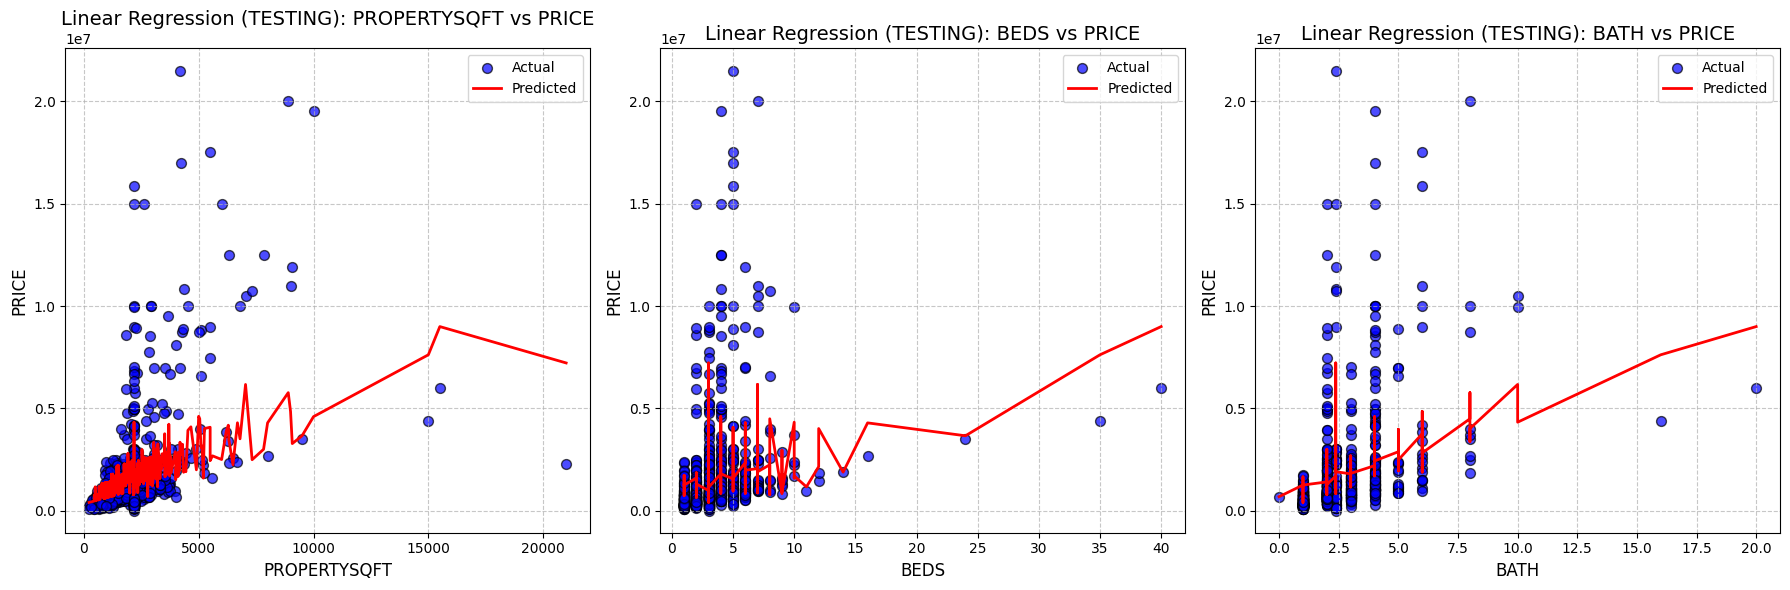

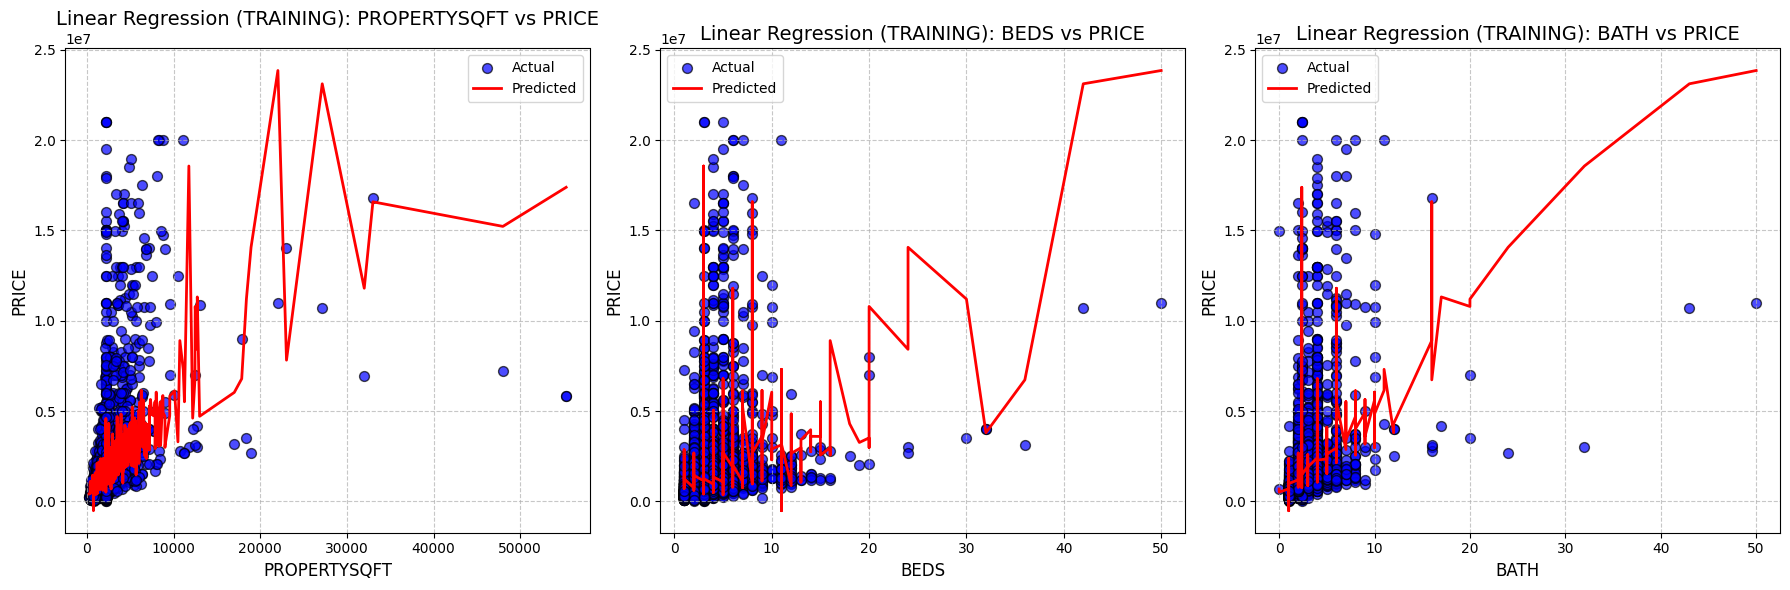

In [ ]:
# Train a Linear Regression Model with L2 normalization
ridge_model = Ridge(alpha=0.1)

evaluate_and_plot_model(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test, selected_feature_indices, feature_names)

### ***Normal Equation***

In [ ]:
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

In [ ]:
# Normal Equation function
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

start_time = time.time()
theta_ne = normal_equation(X_train_b, y_train)
end_time = time.time()

print(f"Normal Equation Coefficients: {theta_ne}")

Normal Equation Coefficients: [ 2.71377452e+05  2.96381427e+02 -1.34386826e+05  4.75328041e+05]


In [ ]:
# loss on normal equation preductions
y_pred = X_test_scaled.dot(theta_ne[1:]) + theta_ne[0]
y_pred_train = X_train_scaled.dot(theta_ne[1:]) + theta_ne[0]

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Testing): {mse}")


mse = mean_squared_error(y_train, y_pred_train)
print(f"MSE (Testing): {mse}")

MSE (Testing): 4153525760115.1143
MSE (Testing): 4712710625652.938


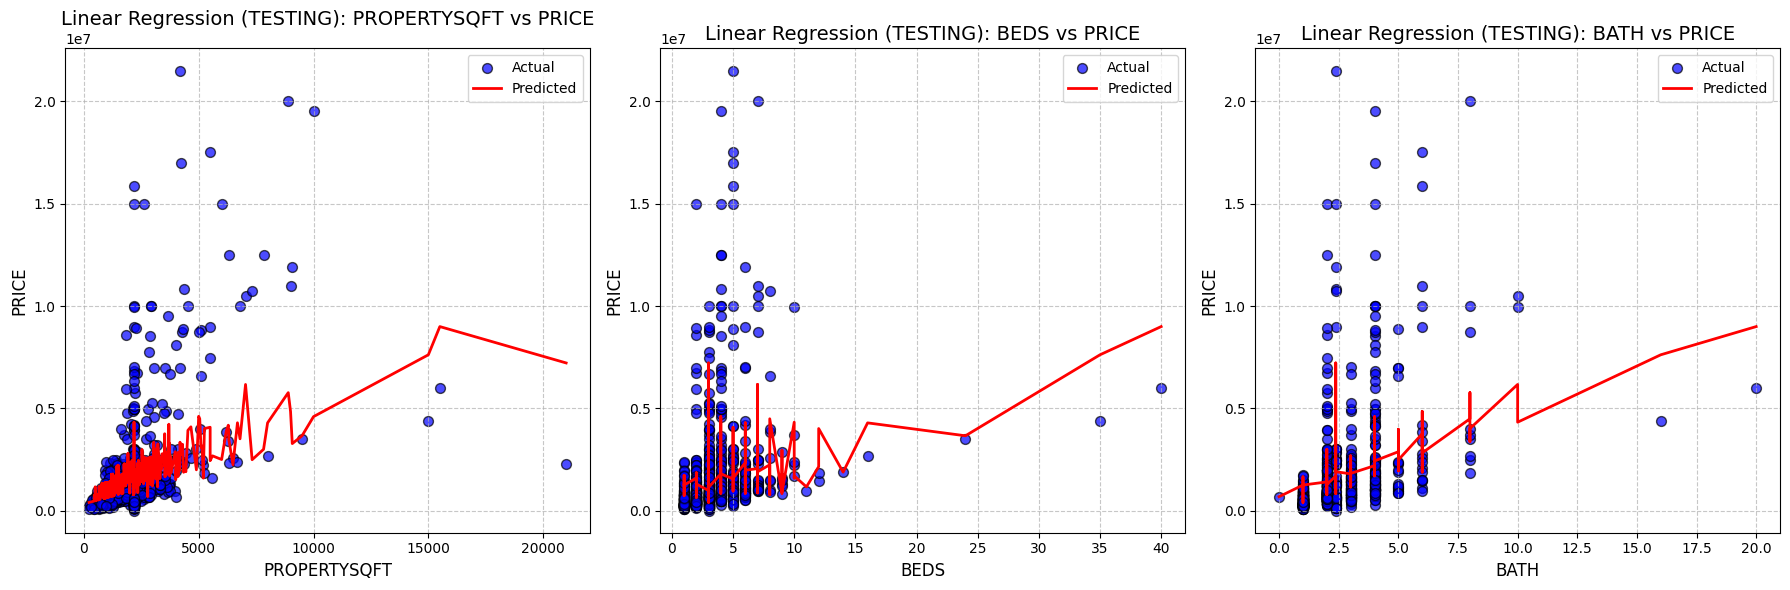

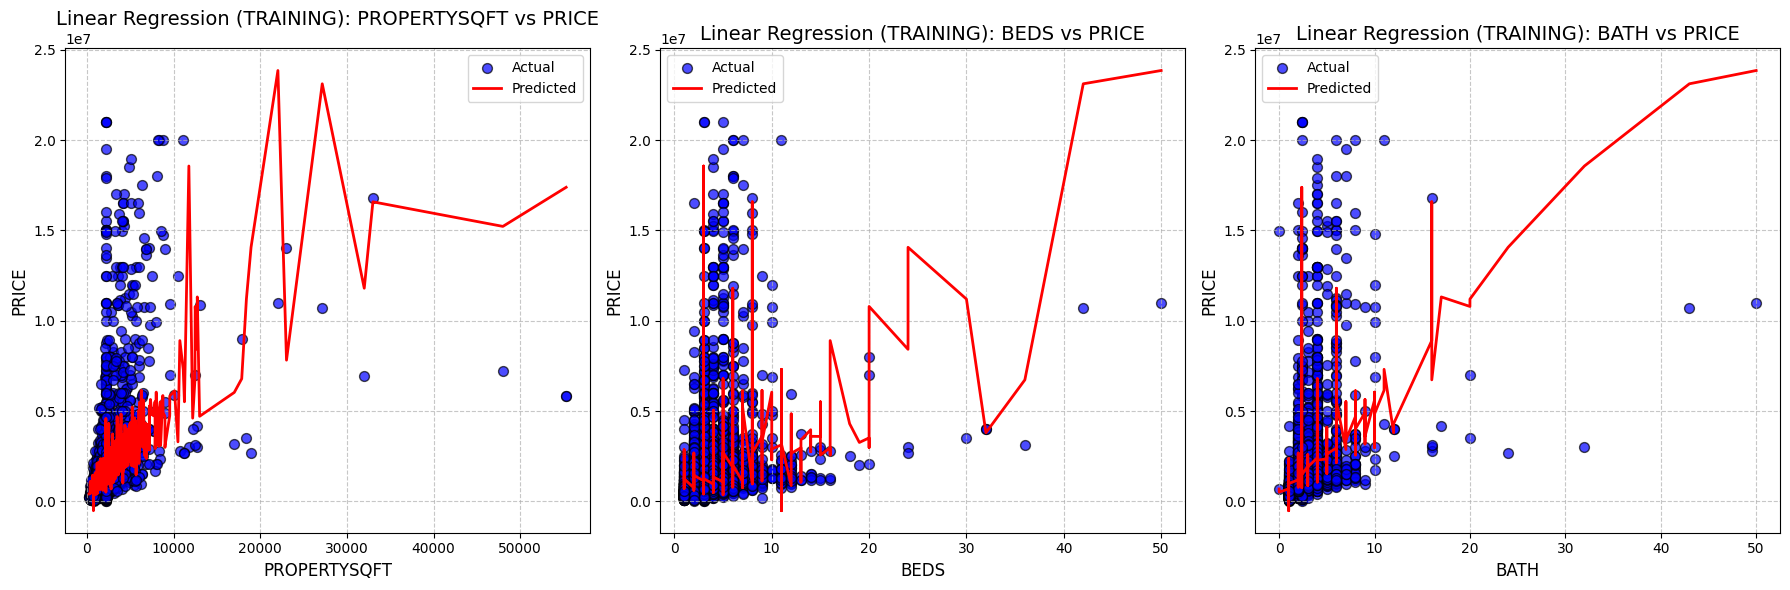

In [ ]:
plot_linear_regression(X_train_scaled, y_train, y_pred_train, X_test_scaled, y_test, y_pred, selected_feature_indices, feature_names)

# ***TASK***



1.   Observe the box plots and try to remove outliers based on the three features and train linear regression models on the newly cleaned data. (Show before leaving lab)

